In [44]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
sales = pd.read_csv('Online Sales Data.csv')
sales.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [15]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [23]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,240.0,10120.500000,69.426220,10001.0,10060.750,10120.50,10180.250,10240.00
Units Sold,240.0,2.158333,1.322454,1.0,1.000,2.00,3.000,10.00
Unit Price,240.0,236.395583,429.446695,6.5,29.500,89.99,249.990,3899.99
Total Revenue,240.0,335.699375,485.804469,6.5,62.965,179.97,399.225,3899.99


In [17]:
sales.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [26]:
sales['Date']=pd.to_datetime(sales['Date'])

In [27]:
sales['Month']=sales['Date'].dt.month

In [28]:
sales.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Month
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,1
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,1
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,1
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,1
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,1


In [29]:
daily_revenue = sales.groupby('Month')['Total Revenue'].sum().reset_index()

In [30]:
daily_revenue 

,Month,Total Revenue
0,1,14548.32
1,2,10803.37
2,3,12849.24
3,4,12451.69
4,5,8455.49
5,6,7384.55
6,7,6797.08
7,8,7278.11


In [31]:
# Define the features and target variable
X = sales[['Product Category', 'Region', 'Payment Method', 'Units Sold', 'Unit Price', 'Month']]
y = sales['Total Revenue']


In [34]:
# One-hot encode categorical features
categorical_features = ['Product Category', 'Region', 'Payment Method']
numeric_features = ['Units Sold', 'Unit Price', 'Month']

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [37]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Units Sold', 'Unit Price',
                                                   'Month']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Product Category', 'Region',
                                                   'Payment Method'])])),
                ('regressor', LinearRegression())])

In [42]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 109.68102712352818
Mean Squared Error: 19943.712679651886
Root Mean Squared Error: 141.22221029162475
R^2 Score: 0.8908411451202638


In [43]:
# Get the coefficients of the linear regression model
coefficients = model.named_steps['regressor'].coef_

# Get the feature names after preprocessing
feature_names = preprocessor.transformers_[0][2] + list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_features))

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

print(coef_df.sort_values(by='Coefficient', ascending=False))

                             Feature  Coefficient
6       Product Category_Electronics   106.371340
7   Product Category_Home Appliances    74.435367
0                         Units Sold    40.960548
14             Payment Method_PayPal     8.337376
10                     Region_Europe     8.337376
11              Region_North America     5.731133
1                         Unit Price     1.024466
12        Payment Method_Credit Card    -0.715487
8            Product Category_Sports    -6.446620
13         Payment Method_Debit Card    -7.621889
5          Product Category_Clothing    -7.621889
9                        Region_Asia   -14.068510
2                              Month   -22.372312
3   Product Category_Beauty Products   -66.097991
4             Product Category_Books  -100.640207


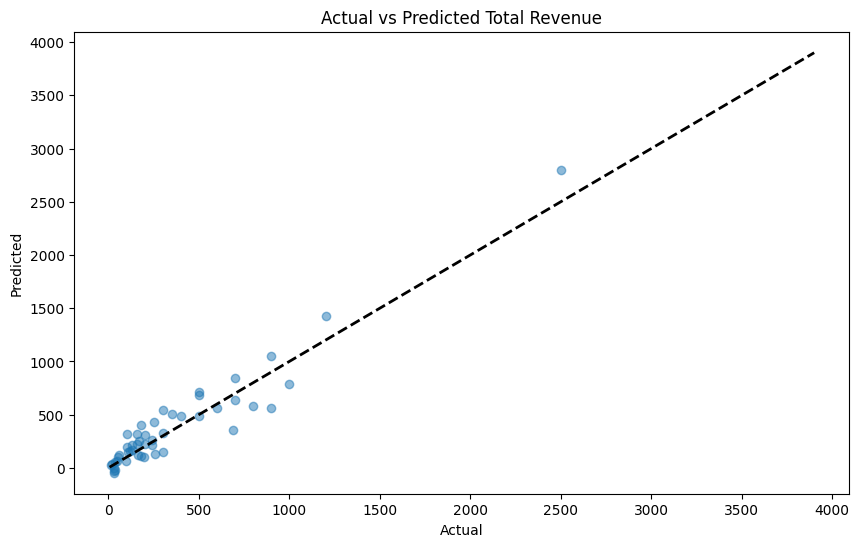

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Total Revenue')
plt.show()
